In [1]:
#importing necessary liraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Load the data
data = pd.read_csv("emp_data.csv")
print(data.head())

   Salary_hike  Churn_out_rate
0         1580              92
1         1600              85
2         1610              80
3         1640              75
4         1660              72


In [3]:
# Check the shape of the data
print(data.shape)

(10, 2)


In [4]:
# Check the datatype
print(data.dtypes)

Salary_hike       int64
Churn_out_rate    int64
dtype: object


In [5]:
#3 DATA PREPROCESSING
# Check for missing values
print(data.isnull().sum())

Salary_hike       0
Churn_out_rate    0
dtype: int64


In [6]:

# Since the dataset is small, we'll assume there are no missing values or outliers to treat.


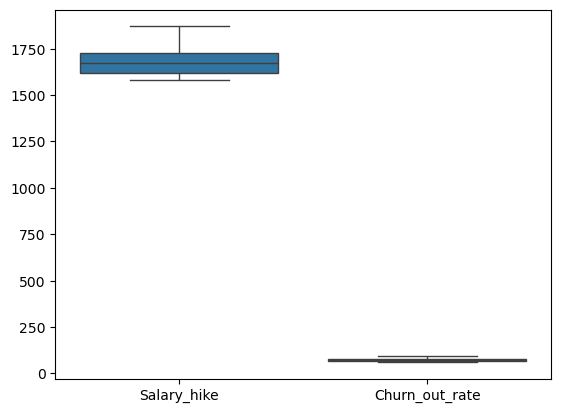

In [9]:
# Check for outliers
sns.boxplot(data[["Salary_hike", "Churn_out_rate"]])
plt.show()

In [10]:
# Descriptive statistics
print(data.describe())

       Salary_hike  Churn_out_rate
count    10.000000       10.000000
mean   1688.600000       72.900000
std      92.096809       10.257247
min    1580.000000       60.000000
25%    1617.500000       65.750000
50%    1675.000000       71.000000
75%    1724.000000       78.750000
max    1870.000000       92.000000


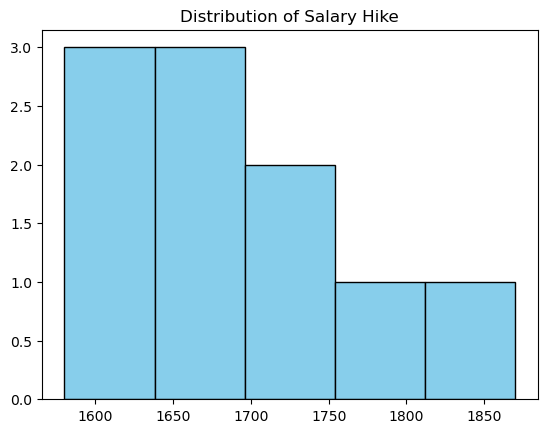

In [12]:
# Univariate Analysis
plt.hist(data['Salary_hike'], bins=5, color='skyblue', edgecolor='black')
plt.title("Distribution of Salary Hike")
plt.show()

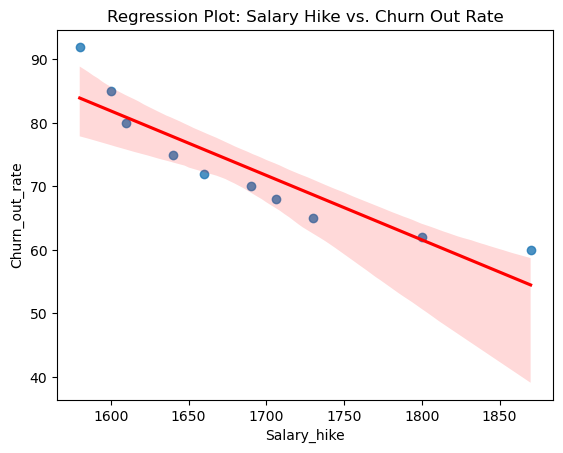

In [14]:
# Bivariate Analysis
# Scatter plot with regression line
sns.regplot(x=data['Salary_hike'], y=data['Churn_out_rate'], line_kws={"color": "red"})
plt.xlabel("Salary_hike")
plt.ylabel("Churn_out_rate")
plt.title("Regression Plot: Salary Hike vs. Churn Out Rate")
plt.show()

In [16]:
# Model Building
# Simple Linear Regression model
X = data[['Salary_hike']]
y = data['Churn_out_rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Initialize the model
model = LinearRegression()

In [18]:
# Fit the model
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Make predictions
y_pred = model.predict(X_test)

In [20]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Simple Linear Regression - RMSE: {rmse}, R-Squared: {r2}')


Simple Linear Regression - RMSE: 2.7570866858265246, R-Squared: 0.9425215350233506


In [21]:
# Apply different transformations and calculate RMSE and correlation coefficient for each model

# Log Transformation
X_log = np.log(X)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y, test_size=0.2, random_state=42)
model_log = LinearRegression()
model_log.fit(X_train_log, y_train_log)
y_pred_log = model_log.predict(X_test_log)

rmse_log = np.sqrt(mean_squared_error(y_test_log, y_pred_log))
r2_log = r2_score(y_test_log, y_pred_log)
print(f'Log Transformation - RMSE: {rmse_log}, R-Squared: {r2_log}')


Log Transformation - RMSE: 2.552073090889979, R-Squared: 0.9507517802552383


In [22]:
# Polynomial Transformation
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_poly)
y_pred_poly = model_poly.predict(X_test_poly)

rmse_poly = np.sqrt(mean_squared_error(y_test_poly, y_pred_poly))
r2_poly = r2_score(y_test_poly, y_pred_poly)
print(f'Polynomial Transformation - RMSE: {rmse_poly}, R-Squared: {r2_poly}')


Polynomial Transformation - RMSE: 1.4475837451980724, R-Squared: 0.9841550192864902


In [23]:
# Choose the best fit model
best_model = min([(rmse, r2, 'Simple Linear Regression'), (rmse_log, r2_log, 'Log Transformation'), (rmse_poly, r2_poly, 'Polynomial Transformation')])

print(f'Best Model: {best_model[2]} with RMSE: {best_model[0]} and R-Squared: {best_model[1]}')

Best Model: Polynomial Transformation with RMSE: 1.4475837451980724 and R-Squared: 0.9841550192864902
